In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# file = "case1-input.txt"
file = "case1-input-phi.txt"
data = pd.read_csv(file, sep="\s+")

Verify that the data looks correct.

In [4]:
data.head()

,rho,ne,v_phi,Te,E_rho,Psi
0,0.000000,0.213281,0.000000e+00,0.000001,0.000000,7.574395e-07
1,0.000005,0.213299,-4.499460e-10,0.000001,0.000002,7.574341e-07
2,0.000010,0.213353,-3.598273e-09,0.000001,0.000004,7.574189e-07
3,0.000015,0.213444,-1.213689e-08,0.000001,0.000006,7.573938e-07
4,0.000020,0.213571,-2.874479e-08,0.000001,0.000008,7.573589e-07


Rename columns, because `ne` was causing problems (I assume there was a name conflict)

In [9]:
data.columns = ["radius", "number_density", "azimuthal_velocity", "temperature", "radial_electric_field", "potential"]

Plot any two columns against each other.

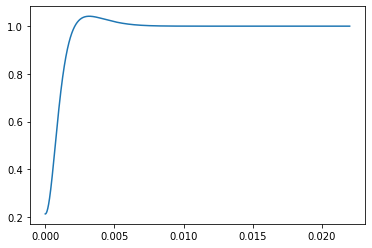

In [11]:
plt.plot(data.radius, data.number_density)
plt.show()

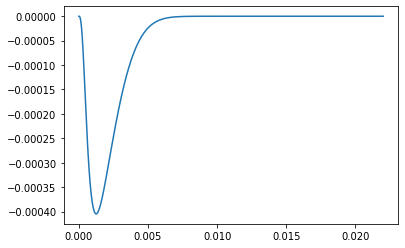

In [12]:
plt.plot(data.radius, data.azimuthal_velocity)
plt.show()

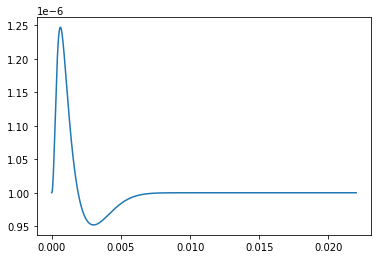

In [13]:
plt.plot(data.radius, data.temperature)
plt.show()

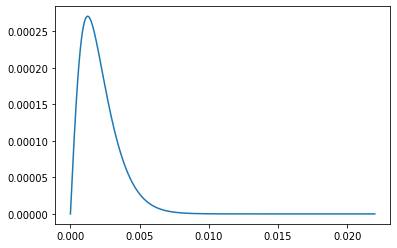

In [8]:
plt.plot(data.radius, data.radial_electric_field)
plt.show()

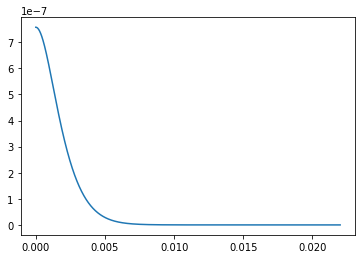

In [11]:
plt.plot(data.radius, data.potential)
plt.show()

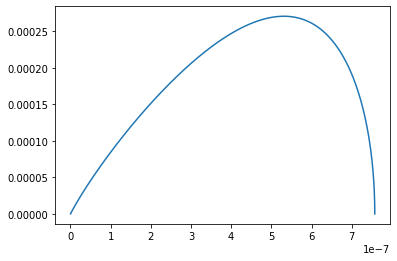

In [10]:
plt.plot(data.potential, data.radial_electric_field)
plt.show()